In [27]:
#import statements
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib
from matplotlib import pyplot as plt
from scipy.spatial import distance
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [3]:
energy = pd.read_csv(r"C:\Users\Admin\OneDrive\Desktop\KAG_energydata_complete.csv")
energy

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [4]:
#shape of the date
energy.shape

(19735, 29)

In [5]:
energy.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [6]:
#looking at null values
energy.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [7]:
#checking datatype
energy.dtypes

date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object

In [9]:
#classification based on appliance usage
def explore(row: float):
  if row >= 97.694958:
    return 'high'
  else:
    return 'low'

appliance = energy['Appliances'].tolist()
classified_data = []
for i in appliance:
  classified_data.append(explore(i))

energy['class']=classified_data
print(energy)

                      date  Appliances  lights         T1       RH_1  \
0      2016-01-11 17:00:00          60      30  19.890000  47.596667   
1      2016-01-11 17:10:00          60      30  19.890000  46.693333   
2      2016-01-11 17:20:00          50      30  19.890000  46.300000   
3      2016-01-11 17:30:00          50      40  19.890000  46.066667   
4      2016-01-11 17:40:00          60      40  19.890000  46.333333   
...                    ...         ...     ...        ...        ...   
19730  2016-05-27 17:20:00         100       0  25.566667  46.560000   
19731  2016-05-27 17:30:00          90       0  25.500000  46.500000   
19732  2016-05-27 17:40:00         270      10  25.500000  46.596667   
19733  2016-05-27 17:50:00         420      10  25.500000  46.990000   
19734  2016-05-27 18:00:00         430      10  25.500000  46.600000   

              T2       RH_2         T3       RH_3         T4  ...     RH_9  \
0      19.200000  44.790000  19.790000  44.730000  19.000

In [10]:
#creating mean vector 1
class_high = energy.loc[energy['class'] == 'high']
mean_1 = np.mean(class_high, axis=0)
standard_1 = np.std(class_high, axis=0)
print(mean_1)
print()
print(standard_1)

Appliances     212.308578
lights           7.004414
T1              21.985503
RH_1            40.932948
T2              20.944998
RH_2            39.943279
T3              22.596391
RH_3            39.316391
T4              21.078326
RH_4            39.100841
T5              19.766510
RH_5            51.809202
T6               9.392589
RH_6            47.970847
T7              20.448817
RH_7            34.616578
T8              22.375359
RH_8            41.662458
T9              19.584370
RH_9            40.693066
T_out            8.583337
Press_mm_hg    754.860286
RH_out          74.690910
Windspeed        4.418037
Visibility      38.101537
Tdewpoint        3.902783
rv1             24.789988
rv2             24.789988
dtype: float64

Appliances     145.666322
lights          10.057777
T1               1.601609
RH_1             4.355308
T2               2.162674
RH_2             4.213024
T3               2.094431
RH_3             3.438485
T4               1.968006
RH_4             4.465

C:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:3579: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [11]:
#creating mean vector 2
class_low = energy.loc[energy['class'] == 'low']
mean_2 = np.mean(class_low, axis=0)
standard_2 = np.std(class_low, axis=0)
print(mean_2)
print()
print(standard_2)

Appliances      56.573258
lights           2.652850
T1              21.579319
RH_1            40.018202
T2              20.124593
RH_2            40.591612
T3              22.149650
RH_3            39.215989
T4              20.775329
RH_4            39.000376
T5              19.529533
RH_5            50.640756
T6               7.379345
RH_6            56.990786
T7              20.201912
RH_7            35.665047
T8              21.904876
RH_8            43.393153
T9              19.450473
RH_9            41.860718
T_out            6.991286
Press_mm_hg    755.760231
RH_out          81.565696
Windspeed        3.904029
Visibility      38.413102
Tdewpoint        3.709732
rv1             25.059089
rv2             25.059089
dtype: float64

Appliances     16.275629
lights          6.654130
T1              1.593999
RH_1            3.806362
T2              2.162968
RH_2            4.003206
T3              1.959991
RH_3            3.185474
T4              2.063153
RH_4            4.295593
T5    

In [12]:
#distance between mean vectors between classes
distance = np.linalg.norm(mean_1 - mean_2)
print(distance)

156.26444056567638


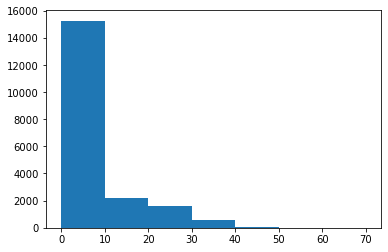

Mean:  3.8018748416518875
Variance:  62.979899190768215


In [13]:
#histogram to observe density
np.histogram(energy['lights'],bins=[0,10,20,30,40,50,60,70],density=True)
plt.hist(energy['lights'],bins=[0,10,20,30,40,50,60,70])
plt.show()
mean_lights = energy['lights'].mean()
var_lights = energy['lights'].var()
print("Mean: ",mean_lights)
print("Variance: ",var_lights)

[1427613.1, 10488.403462646951, 2065.4271754820193, 922.7688611354373, 571.3356478919751, 416.127522552986, 332.41492394729244, 281.24959192392834, 247.20927584048846, 223.14038911772863]


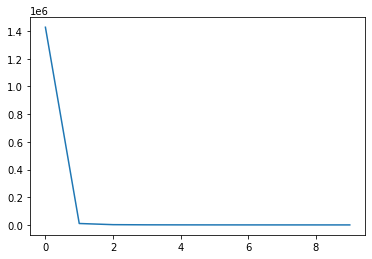

In [20]:
#minkowski distance with r from 1 to 10
x = energy['T_out']
y = energy['RH_out']
plotting_distance = []
for r in range(1,11):
  plotting_distance.append(distance.minkowski(x,y,r))
print(plotting_distance)
plt.plot(plotting_distance)
plt.show()

In [25]:
#dividing into test and train
X = energy.iloc[:,:-1]
y = energy['class']

#using the train test split function
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
print(X_test)

                      date  Appliances  lights         T1       RH_1  \
1034   2016-01-18 21:20:00         440      20  20.600000  40.400000   
16794  2016-05-07 08:00:00          90       0  23.463333  39.133333   
19693  2016-05-27 11:10:00          70       0  24.166667  48.460000   
11940  2016-04-03 15:00:00          90       0  22.633333  42.433333   
11101  2016-03-28 19:10:00         500       0  23.600000  39.430000   
...                    ...         ...     ...        ...        ...   
10441  2016-03-24 05:10:00          60       0  21.500000  38.730000   
14222  2016-04-19 11:20:00          50       0  21.417500  39.645000   
7804   2016-03-05 21:40:00          90      10  20.000000  37.230000   
13515  2016-04-14 13:30:00          50       0  22.000000  41.790000   
17891  2016-05-14 22:50:00          60       0  24.290000  34.117500   

              T2       RH_2         T3       RH_3         T4  ...         T9  \
1034   19.566667  40.433333  21.133333  46.123333  21.0

In [28]:
#K-NN classifier
neigh = KNeighborsClassifier(n_neighbors=3)
x=X_train.iloc[:,3:-1]
neigh.fit(x, y_train)

KNeighborsClassifier(n_neighbors=3)

In [29]:
x1=X_test.iloc[:,3:-1]
s1=neigh.score(x, y_train)
s2=neigh.score(x1, y_test)
print(s1)
print(s2)

0.915882438106269
0.8228339807464955


In [30]:
neigh.predict(X_test.iloc[30:31,3:-1])

array(['low'], dtype=object)

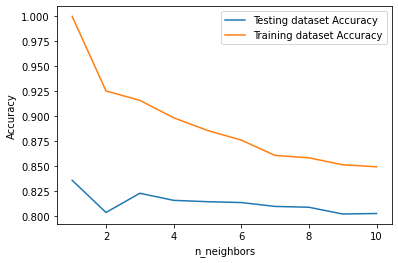

In [31]:
neighbors = np.arange(1, 11)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
for i, k in enumerate(neighbors):
    neigh = KNeighborsClassifier(n_neighbors=k)
    x=X_train.iloc[:,3:-1]
    neigh.fit(x, y_train)
      
    train_accuracy[i] = neigh.score(X_train.iloc[:,3:-1], y_train)
    test_accuracy[i] = neigh.score(X_test.iloc[:,3:-1], y_test)
  
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

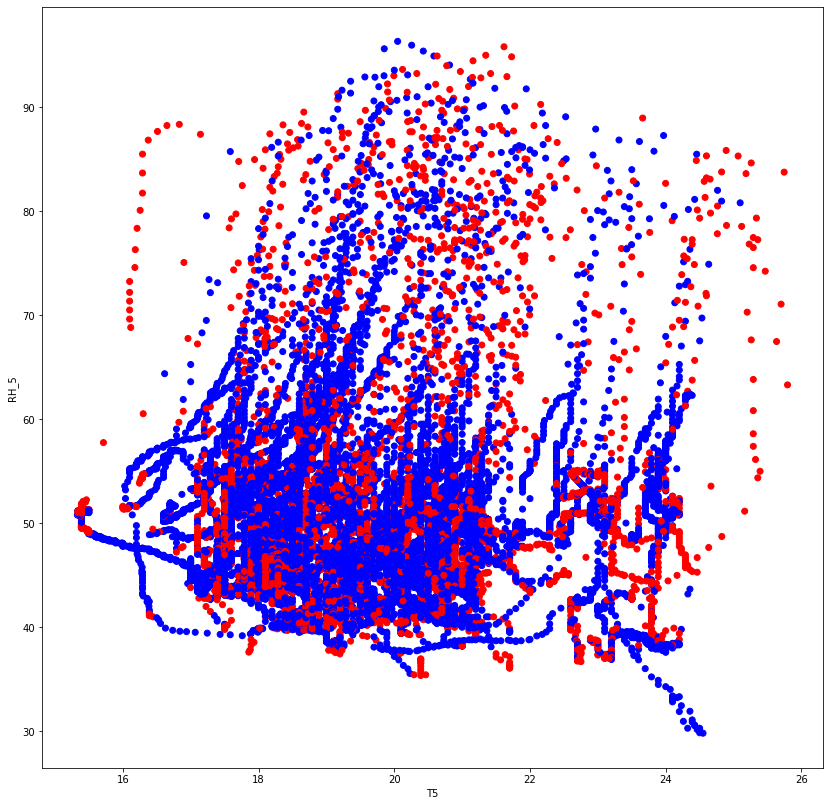

In [33]:
label = [0,1,0,1]
colors = {'high':'red','low':'blue'}

fig = plt.figure(figsize=(14,14))
plt.xlabel("T5")
plt.ylabel("RH_5")
plt.scatter(energy['T5'], energy['RH_5'], c=energy['class'].map(colors))